In [3]:
import pandas as pd
import numpy as np

svt_threshold = [10e-3, 10e-6, 10e-9, 10e-12]

data = []
for t in svt_threshold:
    with open(f"result/threshold_{t}_eps.log") as f:
        lines = f.readlines()
        for line in lines:
            eps_res = [t]
            split = line.split(", ")
            for eps in split:
                if "None" in eps:
                    eps_res.append(np.nan)
                else:
                    eps_res.append(float(eps))
            data.append(eps_res)

df = pd.DataFrame(data=data, columns=["threshold", "Q1", "Q2", "Q3", "Q4", "Q5"])
df

,threshold,Q1,Q2,Q3,Q4,Q5
0,1.000000e-02,10.0,10.00,0.600,10.00,10.00
1,1.000000e-02,10.0,10.00,0.800,10.00,10.00
2,1.000000e-02,10.0,10.00,2.000,10.00,10.00
3,1.000000e-02,10.0,10.00,0.700,10.00,10.00
4,1.000000e-02,10.0,10.00,0.700,10.00,10.00
...,...,...,...,...,...,...
195,1.000000e-11,0.7,0.30,0.030,0.30,0.07
196,1.000000e-11,3.0,0.50,0.005,0.70,NaN
197,1.000000e-11,0.7,0.30,0.008,0.50,0.09
198,1.000000e-11,0.6,0.08,0.010,0.08,0.09


In [4]:
# data = []
# for t in svt_threshold:
#     with open(f"result_q4/threshold_{t}_eps.log") as f:
#         lines = f.readlines()
#         for line in lines:
#             line = line.strip()       
#             if line == "None":
#                 data.append(np.nan)
#             else:
#                 data.append(float(line))
# df["Q4"] = data
# df

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# plt.rcParams['figure.dpi'] = 300
sns.set_theme(style="ticks", font="Times New Roman", font_scale=1.8)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

In [6]:
df = df.melt(id_vars="threshold", var_name="query", value_name="epsilon")
df

,threshold,query,epsilon
0,1.000000e-02,Q1,10.00
1,1.000000e-02,Q1,10.00
2,1.000000e-02,Q1,10.00
3,1.000000e-02,Q1,10.00
4,1.000000e-02,Q1,10.00
...,...,...,...
995,1.000000e-11,Q5,0.07
996,1.000000e-11,Q5,NaN
997,1.000000e-11,Q5,0.09
998,1.000000e-11,Q5,0.09


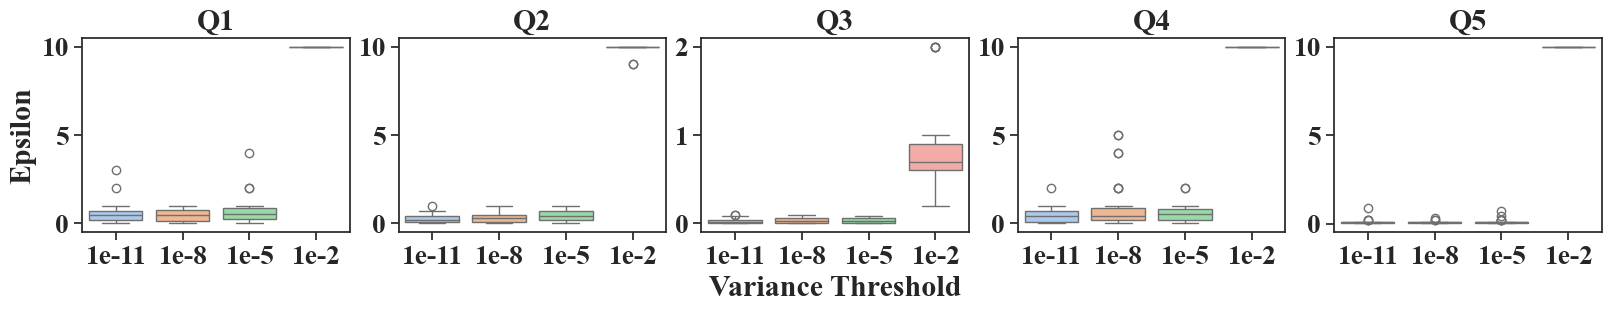

In [7]:
# plt.rcParams["figure.figsize"] = [16, 3]
fig, axes = plt.subplots(1, 5, figsize=(16,3), constrained_layout=True)

for i in range(5):
    data = df[df["query"] == "Q" + str(i+1)]
    g = sns.boxplot(data=data, x="threshold", y="epsilon", hue="threshold", ax=axes[i], legend=False, palette="pastel")
    if i == 0:
        g.set(ylabel="Epsilon")
    else:
        g.set(ylabel=None)
    if i == 2:
        g.set(xlabel="Variance Threshold")
    else:
        g.set(xlabel=None)
    
    axes[i].set_title("Q" + str(i+1), fontweight="bold")
    # g.set(xlabel="Q" + str(i+1))
    # _ = g.set(xlabel=None, ylabel="Epsilon")
    # _ = g.set_yticks([i for i in range(0, 11)])
    _ = g.set_xticks(g.get_xticks())
    _ = g.set_xticklabels(["1e-11", "1e-8", "1e-5", "1e-2"])


# plt.legend(fontsize='x-small', title_fontsize='x-small')
# g.legend_.set_title("Percentile")
# plt.subplots_adjust(wspace=0, hspace=0)
# plt.tight_layout()
plt.savefig("vary_svt_threshold.pdf", bbox_inches = 'tight')
plt.show()
plt.close()